In [1]:
!pip3 install community
!pip3 install python-louvain

  Created wheel for community: filename=community-1.0.0b1-py3-none-any.whl size=2153 sha256=c1d965a6cb83ab9314d0679b9e2b58d24ef07d24708642cbf9d369bfe78d3038
  Stored in directory: /Users/ishaanwatts/Library/Caches/pip/wheels/d9/cf/a6/01e9b603fca646a52b27e42d5c5613cb167c5258109d59ea23
Successfully built community
You should consider upgrading via the '/Users/ishaanwatts/opt/anaconda3/bin/python -m pip install --upgrade pip' command.
     |████████████████████████████████| 204 kB 473 kB/s eta 0:00:01
  Created wheel for python-louvain: filename=python_louvain-0.16-py3-none-any.whl size=9394 sha256=c9041f74710d253016f88de36b1aa7fdc0cf9f92ce1bd13e4c0f1c5a889d99fe
  Stored in directory: /Users/ishaanwatts/Library/Caches/pip/wheels/f6/23/43/a714ed84811240ec3e8e709b8594ecdfbc8ad36ca5d949e38e
Successfully built python-louvain
You should consider upgrading via the '/Users/ishaanwatts/opt/anaconda3/bin/python -m pip install --upgrade pip' command.


In [2]:
import networkx as nx
import community
from importlib import reload
reload(community)

<module 'community' from '/Users/ishaanwatts/opt/anaconda3/lib/python3.7/site-packages/community/__init__.py'>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [4]:
import community.community_louvain as community_louvain

In [59]:
correlation = []

In [60]:
correlation.append(pd.read_csv("Info_1year/Correlation_matrix_0.csv", index_col=0))
correlation.append(pd.read_csv("Info_1year/Correlation_matrix_1.csv", index_col=0))
correlation.append(pd.read_csv("Info_1year/Correlation_matrix_2.csv", index_col=0))
correlation.append(pd.read_csv("Info_1year/Correlation_matrix_3.csv", index_col=0))
#correlation.append(pd.read_csv("Info_1year/Correlation_matrix.csv", index_col=0))

In [61]:
dict_correlation = [corr.to_dict() for corr in correlation]

In [62]:
len(dict_correlation)

4

## Winner Takes All

In [63]:
def get_modularity(y, threshold):
    dict_corr = dict_correlation[y]
    elist = []
    for i in dict_corr.keys():
        for j in dict_corr[i].keys():
            if (abs(dict_corr[i][j]) > threshold):
                if i == j:
                    continue
                elif i < j: 
                    elist.append([i, j,{'weight':abs(dict_corr[i][j])}])
                else:
                    None
                    
    G=nx.Graph()
    G.add_edges_from(elist)
    partition = community.best_partition(G)
    
    G_val = {}
    G_val['nodes'] =  int(nx.number_of_nodes(G))
    G_val['edges'] =  int(nx.number_of_edges(G))
    
    try:
        m = community_louvain.modularity(partition, G)
    except:
        m = 0 
        
        
    print(f'Threshold --> {threshold}')
    print(G_val)
    print(f'Modularity --> {m}')
    print('-----------')
    
    return m

fractions = np.arange(0.40, 0.90, 0.05)

M_list = {}

for i in range(len(dict_correlation)):
    print(f'Window {i}')
    M_list[i] = [get_modularity(i, frac)  for frac in fractions ]

Window 0
Threshold --> 0.4
{'nodes': 192, 'edges': 4462}
Modularity --> 0.16294530649040395
-----------
Threshold --> 0.45
{'nodes': 180, 'edges': 2840}
Modularity --> 0.2063597357255655
-----------
Threshold --> 0.5
{'nodes': 173, 'edges': 1694}
Modularity --> 0.2600731929466905
-----------
Threshold --> 0.55
{'nodes': 152, 'edges': 957}
Modularity --> 0.33608774869396246
-----------
Threshold --> 0.6
{'nodes': 128, 'edges': 501}
Modularity --> 0.4191634030889151
-----------
Threshold --> 0.6499999999999999
{'nodes': 94, 'edges': 252}
Modularity --> 0.5385055217616428
-----------
Threshold --> 0.7
{'nodes': 64, 'edges': 92}
Modularity --> 0.5515965088013298
-----------
Threshold --> 0.75
{'nodes': 36, 'edges': 34}
Modularity --> 0.6574704773488537
-----------
Threshold --> 0.7999999999999999
{'nodes': 18, 'edges': 11}
Modularity --> 0.7561672400113263
-----------
Threshold --> 0.8499999999999999
{'nodes': 6, 'edges': 3}
Modularity --> 0.666348783582378
-----------
Window 1
Threshold -

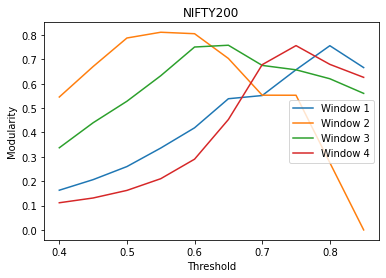

In [232]:
for i in range(len(dict_correlation)):
    plt.plot(fractions, M_list[i], label = f'Window {i+1}')
    
plt.legend()    
plt.xlabel('Threshold')
plt.ylabel('Modularity')
plt.title('NIFTY200')

plt.savefig('Info_1year/modularity.jpg', dpi=1200, bbox_inches = 'tight')
plt.show()

In [65]:
#thresholds = [0.65, 0.5, 0.55 , 0.70, 0.5]
thresholds = [0.65, 0.5, 0.55 , 0.70]

In [66]:
sect_df = pd.read_csv("NIFTY200_StockList.csv")
sect_df.head()

,Company Name,Industry,Symbol,Series,ISIN Code
0,ACC Ltd.,CEMENT & CEMENT PRODUCTS,ACC,EQ,INE012A01025
1,AU Small Finance Bank Ltd.,FINANCIAL SERVICES,AUBANK,EQ,INE949L01017
2,Aarti Industries Ltd.,CHEMICALS,AARTIIND,EQ,INE769A01020
3,Adani Enterprises Ltd.,METALS,ADANIENT,EQ,INE423A01024
4,Adani Green Energy Ltd.,POWER,ADANIGREEN,EQ,INE364U01010


In [67]:
values = sect_df.set_index('Symbol').to_dict(orient='dict')['Industry']

In [140]:
Graphs = {}

Graphs_node_data = {}

def build_graph(y, threshold):
    dict_corr = dict_correlation[y]
    elist = []
    for i in dict_corr.keys():
        for j in dict_corr[i].keys():
            if (abs(dict_corr[i][j]) > threshold[y]):
                if i == j:
                    continue
                elif i < j: 
                    elist.append([i, j,{'weight':abs(dict_corr[i][j])}])
                else:
                    None
                    
    G = nx.Graph()
    G.add_edges_from(elist)
    G.add_nodes_from(correlation[y].index.values)

    for node, value in values.items():
        try:
            G.node[node]['Sector'] = value
        except:
            None
            
    node_data = {} 
            
    partition = community_louvain.best_partition(G)
    
    deg_cent={(k,float(v)) for k,v in nx.degree_centrality(G).items()}
    degree = {(k,float(v)) for k,v in list(nx.degree(G))}
    close_cent= {(k,float(v)) for k,v in nx.closeness_centrality(G).items()}
    betw_cent= {(k,float(v)) for k,v in nx.betweenness_centrality(G).items()}
    
    node_data['community'] = partition
    node_data['degreecent'] = deg_cent
    node_data['closeness'] = close_cent
    node_data['sector'] = values
    node_data['betweenes'] = betw_cent
    node_data['degree'] = degree
    
    nx.set_node_attributes(G, partition, "community")  
    nx.set_node_attributes(G,  nx.degree_centrality(G), "degreecent")
    nx.set_node_attributes(G,  values, "sector")
    nx.set_node_attributes(G, nx.closeness_centrality(G), "closeness")
    nx.set_node_attributes(G, nx.betweenness_centrality(G),"betweenness")
    
    Graphs[y] = G
    Graphs_node_data[y] = node_data
    
    nx.write_gexf(G,f'Info_1year/graph_{y}.gexf')

In [141]:
for i in range(len(dict_correlation)):
    build_graph(i, thresholds)

{('AARTIIND', 0.0),
 ('ABCAPITAL', 0.0),
 ('ABFRL', 0.0),
 ('ACC', 5.0),
 ('ADANIENT', 1.0),
 ('ADANIGREEN', 0.0),
 ('ADANIPORTS', 1.0),
 ('ADANITRANS', 1.0),
 ('AJANTPHARM', 0.0),
 ('ALKEM', 0.0),
 ('AMARAJABAT', 0.0),
 ('AMBUJACEM', 4.0),
 ('APLLTD', 0.0),
 ('APOLLOHOSP', 0.0),
 ('APOLLOTYRE', 10.0),
 ('ASHOKLEY', 12.0),
 ('ASIANPAINT', 0.0),
 ('ASTRAL', 1.0),
 ('ATGL', 1.0),
 ('AUBANK', 0.0),
 ('AUROPHARMA', 1.0),
 ('AXISBANK', 10.0),
 ('BAJAJ-AUTO', 1.0),
 ('BAJAJFINSV', 2.0),
 ('BAJAJHLDNG', 0.0),
 ('BAJFINANCE', 9.0),
 ('BALKRISIND', 0.0),
 ('BANDHANBNK', 6.0),
 ('BANKBARODA', 6.0),
 ('BANKINDIA', 3.0),
 ('BATAINDIA', 6.0),
 ('BEL', 0.0),
 ('BERGEPAINT', 0.0),
 ('BHARATFORG', 4.0),
 ('BHARTIARTL', 0.0),
 ('BHEL', 0.0),
 ('BIOCON', 0.0),
 ('BOSCHLTD', 3.0),
 ('BPCL', 6.0),
 ('BRITANNIA', 0.0),
 ('CADILAHC', 3.0),
 ('CANBK', 23.0),
 ('CASTROLIND', 0.0),
 ('CHOLAFIN', 1.0),
 ('CIPLA', 0.0),
 ('COALINDIA', 5.0),
 ('COFORGE', 2.0),
 ('COLPAL', 0.0),
 ('CONCOR', 0.0),
 ('COROMANDEL', 0

In [70]:
from scipy.stats import linregress

In [98]:
Graphs_info = {}

j = 62
for Y in Graphs.keys():
    
    G_val = {}
    
    G = Graphs[Y]
    
    G_val['nodes'] =  nx.number_of_nodes(G)
    G_val['edges'] =  nx.number_of_edges(G)
    #G_val['AvgDegree'] =  nx.average_degree(G)
    G_val['AvgClustering'] = nx.average_clustering(G)
    
    try:
        G_val['AvgShortestPathLength'] = nx.average_shortest_path_length(G)
    except:
        G_val['AvgShortestPathLength'] = 99999
        
    try:
        G_val['Diameter'] = nx.diameter(G)
    except:
        G_val['Diameter'] = 99999
     
    avg_degree = 0
    degs = {}
    for n in G.nodes() :
        deg = G.degree(n)
        avg_degree += deg
        
        G.
        
        if deg not in degs.keys() :
            degs[deg] = 0
        degs[deg] += 1
    items = sorted(degs.items())
    del items[0]
    
    avg_degree = avg_degree/199
    
    G_val['AvgDegree'] =  avg_degree
    
    x = [k for (k,v) in items]
    y = [v for (k,v) in items]
    
    xlog = np.array([np.log(k) for (k ,v) in items])
    ylog = np.array([np.log(v) for (k ,v) in items])

#     plt.scatter(xlog,ylog)
#     slope,intercept,rvalue,pvalue,stderr=linregress(xlog,ylog)
#     G_val['Slope'] = slope
#     plt.plot(xlog, (slope * xlog + intercept), color='red')
#     plt.title(f'Day {j}, slope {slope}')
#     plt.savefig(f'Info_1year/log{j}.jpg', dpi=1200, bbox_inches = 'tight')
#     plt.show()
    
#     data = [G.degree(n) for n in G.nodes()]
#     pdf, bins, patch = plt.hist(data, bins = 10)
#     plt.ylabel('Nodes')
#     plt.xlabel('Degree')
#     plt.title(f'Day {j}, slope {slope}')
#     plt.savefig(f'Info_1year/hist{j}.jpg', dpi=1200, bbox_inches = 'tight')
#     plt.show()
    
    Graphs_info[Y] = G_val
    
    j += 62
    
Graph_df = pd.DataFrame(Graphs_info).T

In [99]:
Graphs_info

{0: {'nodes': 199,
  'edges': 252,
  'AvgClustering': 0.2297446594294104,
  'AvgShortestPathLength': 99999,
  'Diameter': 99999,
  'AvgDegree': 2.5326633165829144},
 1: {'nodes': 199,
  'edges': 180,
  'AvgClustering': 0.2059503868549094,
  'AvgShortestPathLength': 99999,
  'Diameter': 99999,
  'AvgDegree': 1.8090452261306533},
 2: {'nodes': 199,
  'edges': 225,
  'AvgClustering': 0.21534873117126482,
  'AvgShortestPathLength': 99999,
  'Diameter': 99999,
  'AvgDegree': 2.2613065326633164},
 3: {'nodes': 199,
  'edges': 158,
  'AvgClustering': 0.18855293227152523,
  'AvgShortestPathLength': 99999,
  'Diameter': 99999,
  'AvgDegree': 1.5879396984924623}}

In [49]:
Graph_df.head()

,nodes,edges,AvgClustering,AvgShortestPathLength,Diameter,Slope
0,199.0,252.0,0.229745,99999.0,99999.0,-1.083531
1,199.0,180.0,0.205950,99999.0,99999.0,-1.289079
2,199.0,225.0,0.215349,99999.0,99999.0,-1.227178
3,199.0,158.0,0.188553,99999.0,99999.0,-1.233539
4,199.0,301.0,0.280215,99999.0,99999.0,-1.152567


In [50]:
Graph_df.to_csv('Info_1year/graph_info.csv')

## MST

In [84]:
def calc_d(x):
    x = round(x,3)
    d = math.sqrt(2 * (1 - x))
    return d

In [85]:
dist_dict = {}

for i in range(len(correlation)):
      dist_dict[i] = correlation[i].applymap(calc_d)

In [86]:
dist_dict[0]

,AARTIIND,ABCAPITAL,ABFRL,ACC,ADANIENT,ADANIGREEN,ADANIPORTS,ADANITRANS,AJANTPHARM,ALKEM,...,ULTRACEMCO,UNIONBANK,UPL,VBL,VEDL,VOLTAS,WHIRLPOOL,WIPRO,YESBANK,ZEEL
AARTIIND,0.000000,1.157584,1.155855,1.205819,1.186592,1.150652,1.154123,1.405703,1.306139,1.372589,...,1.136662,1.240161,1.200000,1.133137,1.010940,1.036340,1.363818,1.184061,1.204990,1.174734
ABCAPITAL,1.157584,0.000000,1.076104,1.286079,1.229634,1.222293,1.157584,1.319091,1.379130,1.382751,...,1.257776,1.049762,1.281405,1.218195,1.065833,1.203329,1.418450,1.338656,1.303073,1.111755
ABFRL,1.155855,1.076104,0.000000,1.233694,1.193315,1.223928,1.063015,1.411382,1.264120,1.081665,...,1.131371,1.178134,1.190798,1.236123,1.240967,1.077033,1.402141,1.268069,1.110856,1.118034
ACC,1.205819,1.286079,1.233694,0.000000,0.972625,1.299231,1.001000,1.257776,1.471734,1.352036,...,0.753658,1.228821,0.965401,1.447757,1.242578,0.911043,1.272792,1.086278,1.190798,1.002996
ADANIENT,1.186592,1.229634,1.193315,0.972625,0.000000,1.050714,0.627694,0.948683,1.388524,1.328909,...,1.091788,1.137541,1.061131,1.314534,1.159310,1.137541,1.352036,1.178983,1.182371,1.108152
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
VOLTAS,1.036340,1.203329,1.077033,0.911043,1.137541,1.275147,1.103630,1.414214,1.347590,1.288410,...,0.991968,1.226377,0.904434,1.422674,1.069579,0.000000,1.232883,1.053565,1.133137,0.960208
WHIRLPOOL,1.363818,1.418450,1.402141,1.272792,1.352036,1.504659,1.444991,1.466288,1.475127,1.423376,...,1.260952,1.375500,1.223928,1.438054,1.337161,1.232883,0.000000,1.352036,1.262537,1.252996
WIPRO,1.184061,1.338656,1.268069,1.086278,1.178983,1.415627,1.147170,1.182371,1.281405,1.146298,...,1.161034,1.313012,1.197497,1.493318,1.296148,1.053565,1.352036,0.000000,1.107249,1.141928
YESBANK,1.204990,1.303073,1.110856,1.190798,1.182371,1.408545,1.187434,1.352775,1.144552,1.151521,...,1.089036,1.150652,1.022741,1.328157,1.249800,1.133137,1.262537,1.107249,0.000000,1.228007


In [91]:
elistmst_dict={}

for y in dist_dict.keys():
    price_corr = dist_dict[y]
    
    elistmst = []
    outdict = price_corr.to_dict()
    
    for i in outdict.keys():
        for j in outdict[i].keys():
            if (abs(outdict[i][j]) > 0 and (i>j)):
                elistmst.append([i,j,dict(weight=abs(outdict[i][j]))])
                
    elistmst_dict[y] = elistmst

In [146]:
Graphs_MST_dict = {}
Graphs_MST_node_data = {}

for y in elistmst_dict.keys():
    
    G=nx.Graph()
    elist = elistmst_dict[y]
    
    G.add_edges_from(elist)
    T = nx.minimum_spanning_tree(G)
    G = T
    
    for node, value in values.items():
        try:
            G.node[node]['Sector'] = value
        except:
            None
            
    partition = community.best_partition(G)
    
    node_data = {}
    
    deg_cent={(k,float(v)) for k,v in nx.degree_centrality(G).items()}
    degree = {(k,float(v)) for k,v in list(nx.degree(G))}
    close_cent= {(k,float(v)) for k,v in nx.closeness_centrality(G).items()}
    betw_cent= {(k,float(v)) for k,v in nx.betweenness_centrality(G).items()}
    
    node_data['community'] = partition
    node_data['degreecent'] = deg_cent
    node_data['closeness'] = close_cent
    node_data['sector'] = values
    node_data['betweenes'] = betw_cent
    node_data['degree'] = degree
    
    nx.set_node_attributes(G, partition, "community")  
    nx.set_node_attributes(G,  nx.degree_centrality(G), "degreecent")
    nx.set_node_attributes(G,  values, "sector")
    nx.set_node_attributes(G, nx.closeness_centrality(G), "closeness")
    nx.set_node_attributes(G, nx.betweenness_centrality(G),"betweenness")
    
    T = G
    Graphs_MST_dict[y] = T
    Graphs_MST_node_data[y] = node_data
    
    nx.write_gexf(T,f'Info_1year/graph_mst_{y}.gexf')

In [145]:
G_valMST_dict = {}

j = 62

for Y in Graphs_MST_dict.keys():
    G_val = {}
    G = Graphs_MST_dict[Y]
    
    G_val['nodes'] =  nx.number_of_nodes(G)
    G_val['edges'] =  nx.number_of_edges(G)
    
    G_val['AvgClustering'] = nx.average_clustering(G)
    
    try:
        G_val['AvgShortestPathLength'] = nx.average_shortest_path_length(G)
    except:
        G_val['AvgShortestPathLength'] = 99999
    try:
        G_val['Diameter'] = nx.diameter(G)
    except:
        G_val['Diameter'] = 99999
    
    avg_degree = 0
    degs = {}
    for n in G.nodes() :
        deg = G.degree(n)
        avg_degree += deg
        if deg not in degs.keys() :
            degs[deg] = 0
        degs[deg] += 1
    items = sorted(degs.items())
    
    avg_degree = avg_degree/199
    
    x= [k for (k ,v) in items]
    y= [v for (k ,v) in items]
    
    xlog= np.array([np.log(k) for (k ,v) in items])
    ylog= np.array([np.log(v) for (k ,v) in items])
    
    slope,intercept,rvalue,pvalue,stderr=linregress(xlog,ylog)
    G_val['Slope'] = slope
    
    G_val['AvgDegree'] =  avg_degree
    
#     plt.scatter(xlog,ylog)
#     plt.plot(xlog, (slope * xlog + intercept), color='red')
#     plt.title(f'Day {j}, slope {slope}')
#     plt.savefig(f'Info_1year/mst_log{j}.jpg', dpi=1200, bbox_inches = 'tight')
#     plt.show()
    
#     data = [G.degree(n) for n in G.nodes()]
#     pdf, bins, patch = plt.hist(data, bins = 10)
#     plt.title(f'Day {j}, slope {slope}')
#     plt.ylabel('Nodes')
#     plt.xlabel('Degree')
#     plt.savefig(f'Info_1year/mst_hist{j}.jpg', dpi=1200, bbox_inches = 'tight')
#     plt.show()
    
    j += 62
    
    G_valMST_dict[Y] = G_val
    
GMST_df = pd.DataFrame(G_valMST_dict).T

In [103]:
GMST_df.head()

,nodes,edges,AvgClustering,AvgShortestPathLength,Diameter,Slope,AvgDegree
0,199.0,198.0,0.0,8.906350,22.0,-2.150010,1.98995
1,199.0,198.0,0.0,11.659002,34.0,-1.900252,1.98995
2,199.0,198.0,0.0,11.830567,31.0,-2.355207,1.98995
3,199.0,198.0,0.0,8.763616,19.0,-1.980212,1.98995


In [58]:
GMST_df.to_csv('Info_1year/graph_mst_info.csv')

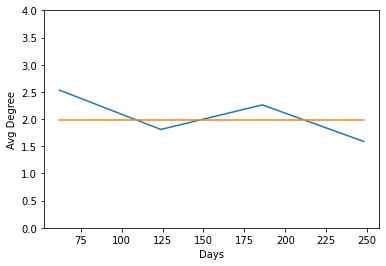

In [123]:
plt.plot([62,124,186,248], Graph_df['AvgDegree'])
plt.plot([62,124,186,248], GMST_df['AvgDegree'])
plt.xlabel('Days')
plt.ylabel('Avg Degree')
plt.ylim(0,4)
plt.savefig(f'Info_1year/avgdegree.jpg', dpi=1200, bbox_inches = 'tight')
plt.show()

In [233]:
for y in range(4):
    data = Graphs_node_data[y]
    
    for key in data.keys():
        a = list(data[key])
        
        if key == 'closeness':
            a.sort(key = lambda x: x[1])     
        else:
            a.sort(key = lambda x: x[1], reverse= True)
            
        data[key] = a

In [153]:
for key in Graphs_node_data[0].keys():
    print(key)

community
degreecent
closeness
sector
betweenes
degree


In [234]:
metric = ['degree', 'betweenes', 'closeness', 'degreecent']

In [235]:
params = ['Degree', 'Betweeness Centrality', 'Closeness Centrality', 'Degree Centrality']

In [236]:
k = 0
for m in metric:
    
    window_no = []
    symbol = []
    val = []
    name = []
    sector = []
    
    df = pd.DataFrame()
    
    for y in range(4):
        for i in range(3):
            window_no.append(y+1)
            symbol.append(Graphs_node_data[y][m][i][0])
            val.append(Graphs_node_data[y][m][i][1])
            name.append(symbol_map[symbol[-1]][1])
            sector.append(symbol_map[symbol[-1]][0])
            
    df['Window'] = window_no
    df['Symbol'] = symbol
    df['Company Name'] = name
    df[params[k]] = val
    df['Industry'] = sector
    
    k+=1

    df.to_csv(f'Info_1year/{m}.csv')

In [173]:
symbol_map = {}

In [174]:
for i in range(len(sect_df['Symbol'])):
    symbol_map[sect_df['Symbol'][i]] = [sect_df['Industry'][i], sect_df['Company Name'][i]]

In [175]:
symbol_map

{'ACC': ['CEMENT & CEMENT PRODUCTS', 'ACC Ltd.'],
 'AUBANK': ['FINANCIAL SERVICES', 'AU Small Finance Bank Ltd.'],
 'AARTIIND': ['CHEMICALS', 'Aarti Industries Ltd.'],
 'ADANIENT': ['METALS', 'Adani Enterprises Ltd.'],
 'ADANIGREEN': ['POWER', 'Adani Green Energy Ltd.'],
 'ADANIPORTS': ['SERVICES', 'Adani Ports and Special Economic Zone Ltd.'],
 'ATGL': ['OIL & GAS', 'Adani Total Gas Ltd.'],
 'ADANITRANS': ['POWER', 'Adani Transmission Ltd.'],
 'ABCAPITAL': ['FINANCIAL SERVICES', 'Aditya Birla Capital Ltd.'],
 'ABFRL': ['CONSUMER SERVICES', 'Aditya Birla Fashion and Retail Ltd.'],
 'AJANTPHARM': ['PHARMA', 'Ajanta Pharmaceuticals Ltd.'],
 'APLLTD': ['PHARMA', 'Alembic Pharmaceuticals Ltd.'],
 'ALKEM': ['PHARMA', 'Alkem Laboratories Ltd.'],
 'AMARAJABAT': ['AUTOMOBILE', 'Amara Raja Batteries Ltd.'],
 'AMBUJACEM': ['CEMENT & CEMENT PRODUCTS', 'Ambuja Cements Ltd.'],
 'APOLLOHOSP': ['HEALTHCARE SERVICES', 'Apollo Hospitals Enterprise Ltd.'],
 'APOLLOTYRE': ['AUTOMOBILE', 'Apollo Tyres Ltd

In [201]:
high_degree = pd.read_csv('Info_1year/degree.csv', index_col=0)
high_degree.head()

,Window,Symbol,Company Name,Degree,Industry
0,1,CANBK,Canara Bank,23.0,FINANCIAL SERVICES
1,1,RBLBANK,RBL Bank Ltd.,21.0,FINANCIAL SERVICES
2,2,RBLBANK,RBL Bank Ltd.,10.0,FINANCIAL SERVICES
3,2,BANKBARODA,Bank of Baroda,9.0,FINANCIAL SERVICES
4,3,NMDC,NMDC Ltd.,20.0,METALS


In [202]:
degree_centrality = pd.read_csv('Info_1year/degreecent.csv', index_col=0)
degree_centrality.head()

,Window,Symbol,Company Name,Degree Centrality,Industry
0,1,CANBK,Canara Bank,0.116162,FINANCIAL SERVICES
1,1,RBLBANK,RBL Bank Ltd.,0.106061,FINANCIAL SERVICES
2,2,RBLBANK,RBL Bank Ltd.,0.050505,FINANCIAL SERVICES
3,2,CANBK,Canara Bank,0.045455,FINANCIAL SERVICES
4,3,NMDC,NMDC Ltd.,0.101010,METALS


In [206]:
betweness_centrality = pd.read_csv('Info_1year/betweenes.csv', index_col=0)
betweness_centrality.head()

,Window,Symbol,Company Name,Betweeness Centrality,Industry
0,1,TATAPOWER,Tata Power Co. Ltd.,0.035642,POWER
1,1,CANBK,Canara Bank,0.019181,FINANCIAL SERVICES
2,2,CADILAHC,Cadila Healthcare Ltd.,0.091936,PHARMA
3,2,BANKBARODA,Bank of Baroda,0.069657,FINANCIAL SERVICES
4,3,NMDC,NMDC Ltd.,0.040929,METALS


In [237]:
closeness_centrality = pd.read_csv('Info_1year/closeness.csv', index_col=0)
closeness_centrality.head()

,Window,Symbol,Company Name,Closeness Centrality,Industry
0,1,POWERGRID,Power Grid Corporation of India Ltd.,0.0,POWER
1,1,DABUR,Dabur India Ltd.,0.0,CONSUMER GOODS
2,1,VBL,Varun Beverages Ltd.,0.0,CONSUMER GOODS
3,2,DABUR,Dabur India Ltd.,0.0,CONSUMER GOODS
4,2,LT,Larsen & Toubro Ltd.,0.0,CONSTRUCTION


In [239]:
for y in range(4):
    data = Graphs_MST_node_data[y]
    
    for key in data.keys():
        a = list(data[key])
        
        if key == 'closeness':
            a.sort(key = lambda x: x[1])
            
        else:
            a.sort(key = lambda x: x[1], reverse= True)
        data[key] = a

In [240]:
for key in Graphs_MST_node_data[0].keys():
    print(key)

community
degreecent
closeness
sector
betweenes
degree


In [241]:
k = 0
for m in metric:
    
    window_no = []
    symbol = []
    val = []
    name = []
    sector = []
    
    df = pd.DataFrame()
    
    for y in range(4):
        for i in range(3):
            window_no.append(y+1)
            symbol.append(Graphs_MST_node_data[y][m][i][0])
            val.append(Graphs_MST_node_data[y][m][i][1])
            name.append(symbol_map[symbol[-1]][1])
            sector.append(symbol_map[symbol[-1]][0])
            
    df['Window'] = window_no
    df['Symbol'] = symbol
    df['Company Name'] = name
    df[params[k]] = val
    df['Industry'] = sector
    
    k+=1

    df.to_csv(f'Info_1year/MST_{m}.csv')

In [242]:
high_degree = pd.read_csv('Info_1year/MST_degree.csv', index_col=0)
high_degree.head()

,Window,Symbol,Company Name,Degree,Industry
0,1,TATAMOTORS,Tata Motors Ltd.,8.0,AUTOMOBILE
1,1,CANBK,Canara Bank,8.0,FINANCIAL SERVICES
2,1,DLF,DLF Ltd.,8.0,CONSTRUCTION
3,2,IOC,Indian Oil Corporation Ltd.,6.0,OIL & GAS
4,2,L&TFH,L&T Finance Holdings Ltd.,6.0,FINANCIAL SERVICES


In [212]:
degree_centrality = pd.read_csv('Info_1year/MST_degreecent.csv', index_col=0)
degree_centrality.head()

,Window,Symbol,Company Name,Degree Centrality,Industry
0,1,DLF,DLF Ltd.,0.040404,CONSTRUCTION
1,1,TATAMOTORS,Tata Motors Ltd.,0.040404,AUTOMOBILE
2,2,L&TFH,L&T Finance Holdings Ltd.,0.030303,FINANCIAL SERVICES
3,2,IOC,Indian Oil Corporation Ltd.,0.030303,OIL & GAS
4,3,BANKBARODA,Bank of Baroda,0.040404,FINANCIAL SERVICES


In [213]:
betweness_centrality = pd.read_csv('Info_1year/MST_betweenes.csv', index_col=0)
betweness_centrality.head()

,Window,Symbol,Company Name,Betweeness Centrality,Industry
0,1,TATAMOTORS,Tata Motors Ltd.,0.588730,AUTOMOBILE
1,1,LICHSGFIN,LIC Housing Finance Ltd.,0.576424,FINANCIAL SERVICES
2,2,CADILAHC,Cadila Healthcare Ltd.,0.704353,PHARMA
3,2,BANKBARODA,Bank of Baroda,0.559760,FINANCIAL SERVICES
4,3,NMDC,NMDC Ltd.,0.675999,METALS


In [243]:
closeness_centrality = pd.read_csv('Info_1year/MST_closeness.csv', index_col=0)
closeness_centrality.head()

,Window,Symbol,Company Name,Closeness Centrality,Industry
0,1,TATAELXSI,Tata Elxsi Ltd.,0.068798,IT
1,1,GLAND,Gland Pharma Ltd.,0.068798,PHARMA
2,1,ALKEM,Alkem Laboratories Ltd.,0.073743,PHARMA
3,2,IPCALAB,Ipca Laboratories Ltd.,0.048304,PHARMA
4,2,PIDILITIND,Pidilite Industries Ltd.,0.050743,CHEMICALS


In [217]:
#Communities Detected

In [218]:
MST = [15, 16, 14, 15]
Winner = [118, 105, 110, 131]

In [227]:
community_df = pd.DataFrame()

In [228]:
community_df['Window'] = [1,2,3,4]
community_df['MST Communities'] = MST
community_df['Winner Takes all communities'] = Winner

In [229]:
community_df.head()

,Window,MST Communities,Winner Takes all communities
0,1,15,118
1,2,16,105
2,3,14,110
3,4,15,131


In [231]:
community_df.to_csv('Info_1year/community_df.csv')